# **Building Pipeline**

1. Created `src` (source) folder to store pipeline component files.

2. Created `src` component files which are the main files for the ML pipeline.

3. Added the `Data/` folder to `.gitignore`.

4. Run `git add .`, `git commit`, `git push origin main`.

Setting up DVC pipeline (without params): this forms the pipeline and runs `src` files one by one.

5. Create `dvc.yaml` file and add stages to it.

6. Run `dvc init` then `dvc repro` to execute the pipeline. This creates a `dvc.lock` file that contains MD5 hashes; the lock file changes whenever code or data change in any stage, which is useful for rolling back to a previous pipeline run with its data.

7. Use `dvc dag` to visualize the pipeline graph.

Setting up DVC pipeline automation (with parameters): useful for experimenting with different hyperparameters.

8. Add `params.yaml` file.

9. Add the parameter configuration.

# **Logger**

## Logger: A logger is a module used to record logs from Python code. It can track errors, warnings, info, etc.

## How does the logger work?

>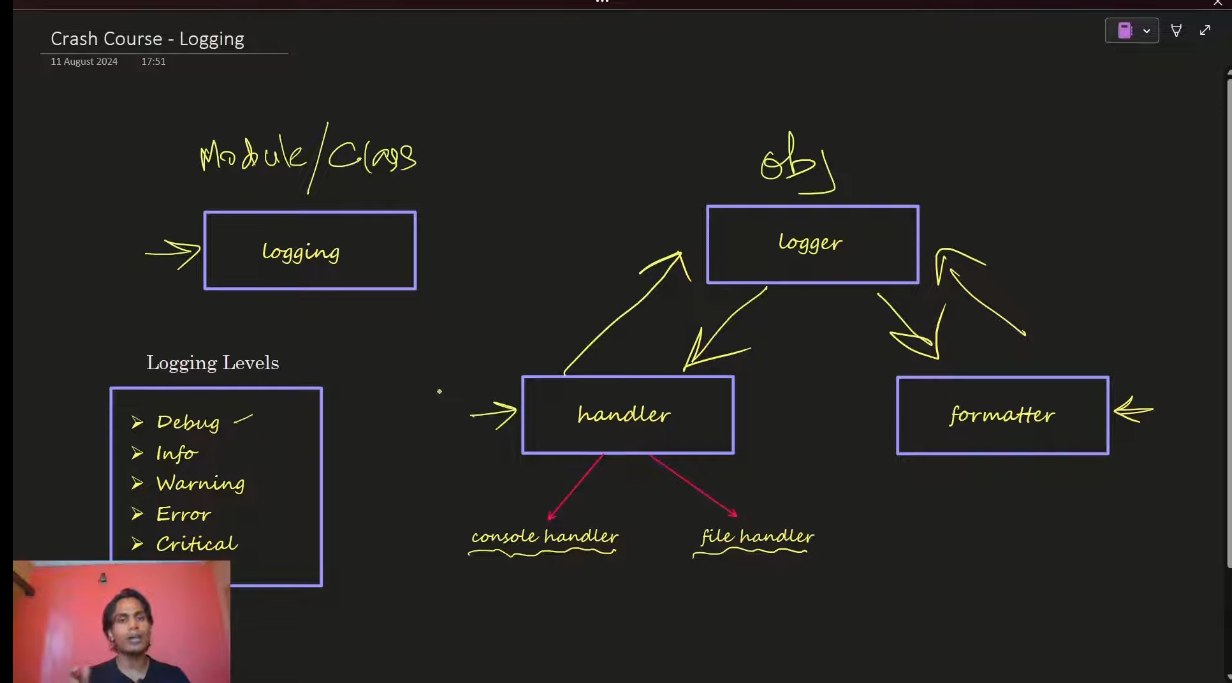

> Create a logger object → create handlers (console & file handler) → create a formatter → assign the formatter to the handlers → add handlers to the logger object.



logger = logging.getLogger("Model evaluation")
logger.setLevel('DEBUG')

console_handler = logging.StreamHandler()
console_handler.setLevel('DEBUG')

path = '/home/santosh/Desktop/MLOps/Class_3_ML_Pipeline/Log'
file_handler = logging.FileHandler(os.path.join(path, 'model_evaluation.log'))
file_handler.setLevel('DEBUG')

fmt = logging.Formatter('%(asctime)s   |  %(name)s  |  %(levelname)s  |  %(message)s')

console_handler.setFormatter(fmt)
file_handler.setFormatter(fmt)

logger.addHandler(console_handler)
logger.addHandler(file_handler)

# **YAML**

## YAML: YAML is a human-readable data serialization format. It is based on key-value pairs and uses indentation like Python. A valid JSON file can be converted into YAML.

> Easy syntax.

> Used in DevOps, MLOps, CI/CD.

## Syntax for staging




In [ ]:
\
\
,
,
,

### Run the dvc.yaml pipeline automation

Use `dvc repro` — this runs all stages in order and creates a `dvc.lock` file that contains MD5 hashes for stage dependencies and outputs.

### Why MD5 hash codes?

MD5 hashes allow you to roll back to a previously run pipeline along with the exact data for that run.

Suppose you run the pipeline and later notice excessive overfitting. You may add L1/L2 regularization or increase `min_samples_leaf` in tree-based models, then rerun the pipeline.

If these changes occur in stage 3 (model training) and earlier stages are unchanged, DVC will detect unchanged stages and skip them, running from stage 3 onward. Therefore, put stages in logical sequence in `dvc.yaml`.

If you want to roll back to a previous run, make sure you tracked `dvc.lock` and other pipeline files with Git (`git add .` and `git commit -m 'message'`).

Then copy the SHA ID of the previous commit (the pipeline run) and run `git checkout <SHA>`.

Finally, run `dvc pull` to update the data for the rolled-back commit.